In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

# Fitting RNN s2s

## FIT 1

First fit experiment RNN seq2seq, explore lag, dropout and number of input neurons, number of layers and number of neurons in the fully connected layer

In [132]:

query={'experiment':'rnns2sfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'nlayers', 'full'], data=['lag'])

In [138]:
#results.exp_df 

In [134]:
# plt.figure(figsize=(12,8), dpi=100)
# plt.style.use('seaborn-whitegrid')
# plt.xticks(rotation=90)
# sns.boxplot(x='neurons', y='test', data=results.exp_df[results.exp_df.hour==1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4dd20dfd0>,
      dtype=object)

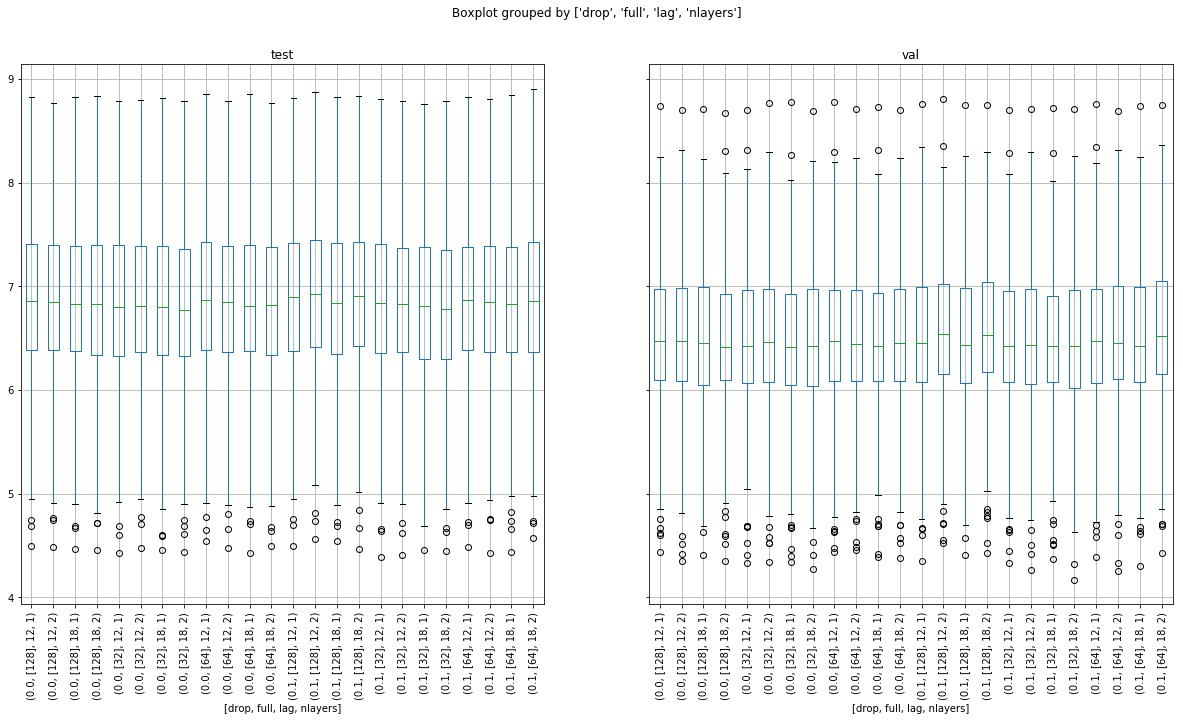

In [140]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'nlayers', 'lag', 'full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
a[a['neurons']=='64'].boxplot(by=['drop','full', 'lag', 'nlayers'],figsize=(20,10), rot=90)

In [41]:
# plt.figure(figsize=(12,8), dpi=100)
# plt.style.use('seaborn-whitegrid')
# plt.xticks(rotation=90)
#sns.boxplot(x='neuronsD', by='dropout', y='test', data=a)
#a.boxplot(by=['neurons', 'nlayers'],figsize=(20,10))

Selects the 500 best/worst results and plots in a map the sum of R² of all the hours for test and validation

In [42]:
#a.boxplot(by='neurons',figsize=(20,10))

In [43]:
#a.boxplot(by='drop',figsize=(20,10))

In [44]:
b =a.groupby(by=['neurons', 'nlayers', 'drop', 'lag', 'full'],as_index=False).mean()
b[b.neurons=='64'].style.highlight_max()

,neurons,nlayers,drop,lag,full,test,val
48,64,1,0.0,12,[128],6.81122,6.50493
49,64,1,0.0,12,[32],6.77719,6.47511
50,64,1,0.0,12,[64],6.80115,6.49167
51,64,1,0.0,18,[128],6.79477,6.47753
52,64,1,0.0,18,[32],6.75001,6.44591
53,64,1,0.0,18,[64],6.78488,6.46812
54,64,1,0.1,12,[128],6.82903,6.51836
55,64,1,0.1,12,[32],6.77834,6.47607
56,64,1,0.1,12,[64],6.79629,6.4962
57,64,1,0.1,18,[128],6.79688,6.4801


Best results  64/2/0.1/12/128

## Fit 2

Second fit of RNN, explore type of unit, lag and some more neuronsE and neuronsD

In [142]:
query={'experiment':'rnns2sfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'full'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4df58d4e0>,
      dtype=object)

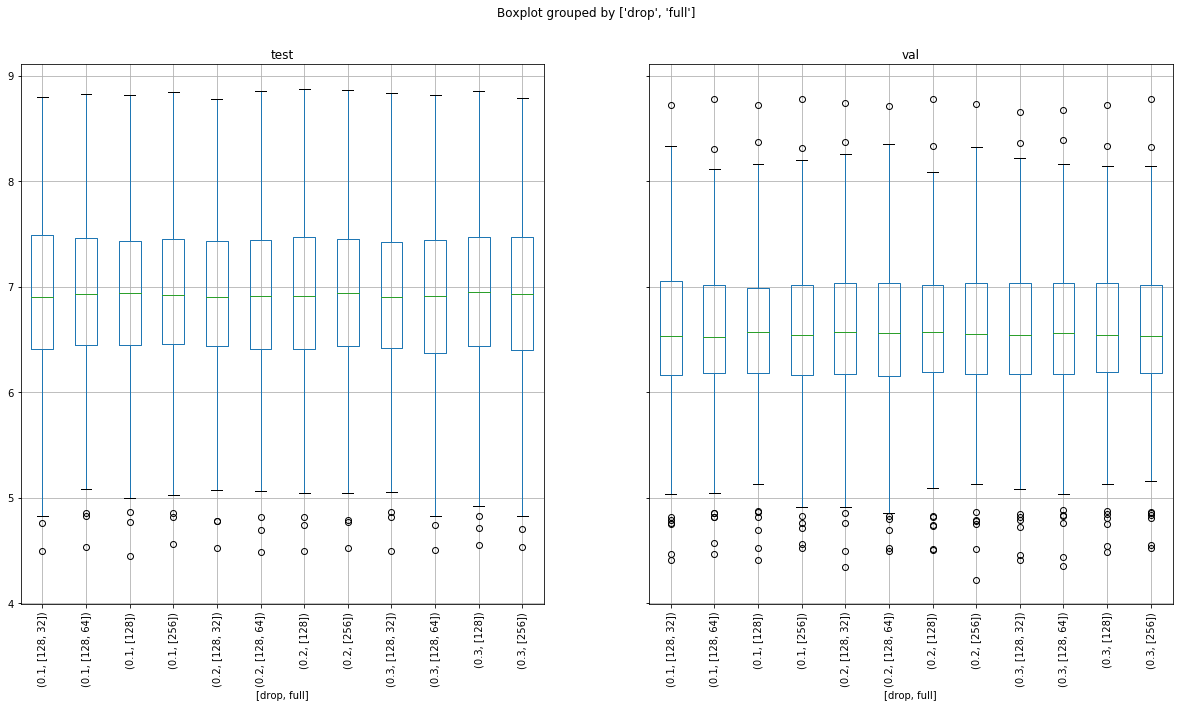

In [143]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
a[a['neurons']=='64'].boxplot(by=['drop','full'],figsize=(20,10), rot=90)

In [145]:
b =a.groupby(by=['neurons', 'drop', 'full'],as_index=False).mean()
#b

In [146]:
#b.describe(include='all')

In [149]:
b[b.neurons=='32'].style.highlight_max()

,neurons,drop,full,test,val
0,32,0.1,"[128, 32]",6.8689,6.58063
1,32,0.1,"[128, 64]",6.88045,6.5908
2,32,0.1,[128],6.88756,6.58674
3,32,0.1,[256],6.88434,6.58162
4,32,0.2,"[128, 32]",6.87171,6.59261
5,32,0.2,"[128, 64]",6.87446,6.59508
6,32,0.2,[128],6.88677,6.60004
7,32,0.2,[256],6.89097,6.59325
8,32,0.3,"[128, 32]",6.86933,6.59101
9,32,0.3,"[128, 64]",6.87844,6.59996


Best results 32/2/0.3/12/256/GRU

## Fit 3

Third fit of RNN, explore number of layers

In [95]:
query={'experiment':'rnns2sfit3'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'nlayers', 'full', 'fulldrop'],data=['lag'])

In [96]:
# results.exp_df 

In [97]:
#results.exp_df['fulldrop'].value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdac91b4e0>,
      dtype=object)

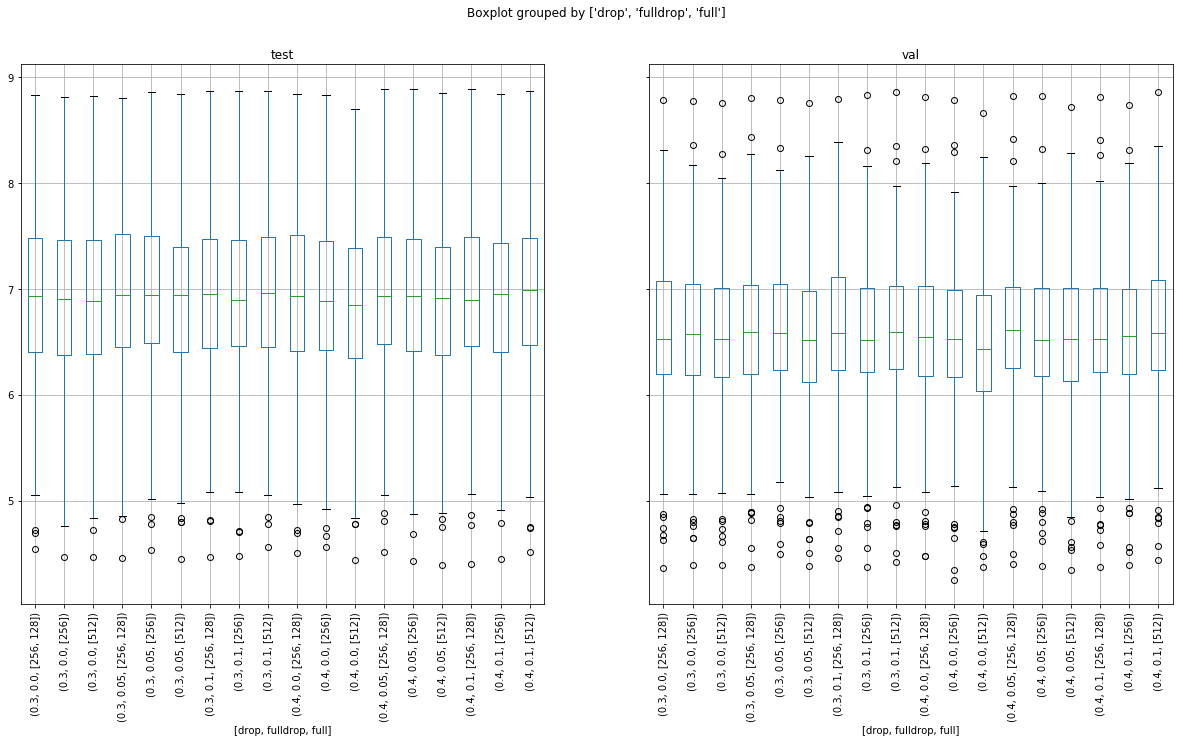

In [99]:
a=results.exp_df.groupby(['site', 'full', 'fulldrop', 'lag', 'drop','neurons', 'nlayers'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
a[a['lag']=='12'].boxplot(by=['drop', 'fulldrop','full'],figsize=(20,10), rot=90)

In [101]:
b =a.groupby(by=['full', 'fulldrop', 'lag', 'drop','neurons','nlayers' ],as_index=False).mean()
b.style.highlight_max()

,full,fulldrop,lag,drop,neurons,nlayers,test,val
0,"[256, 128]",0.0,12,0.3,32,2,6.86642,6.57603
1,"[256, 128]",0.0,12,0.4,32,2,6.87368,6.57497
2,"[256, 128]",0.0,18,0.3,32,2,6.80406,6.50412
3,"[256, 128]",0.0,18,0.4,32,2,6.80098,6.4848
4,"[256, 128]",0.05,12,0.3,32,2,6.89042,6.60166
5,"[256, 128]",0.05,12,0.4,32,2,6.8867,6.60287
6,"[256, 128]",0.05,18,0.3,32,2,6.8357,6.53171
7,"[256, 128]",0.05,18,0.4,32,2,6.85067,6.54305
8,"[256, 128]",0.1,12,0.3,32,2,6.88703,6.60549
9,"[256, 128]",0.1,12,0.4,32,2,6.85256,6.5657


Best results 32/2/0.4/12/512/0.1/GRU

## Fit 4

Fourth fit of RNN, reexplore lag, decoder neurons, dropout and decoder layers

In [85]:
query={'experiment':'rnns2sfit4'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'full', 'fulldrop'])

In [86]:
#results.exp_df 

In [87]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'fulldrop','full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdcb1530f0>,
      dtype=object)

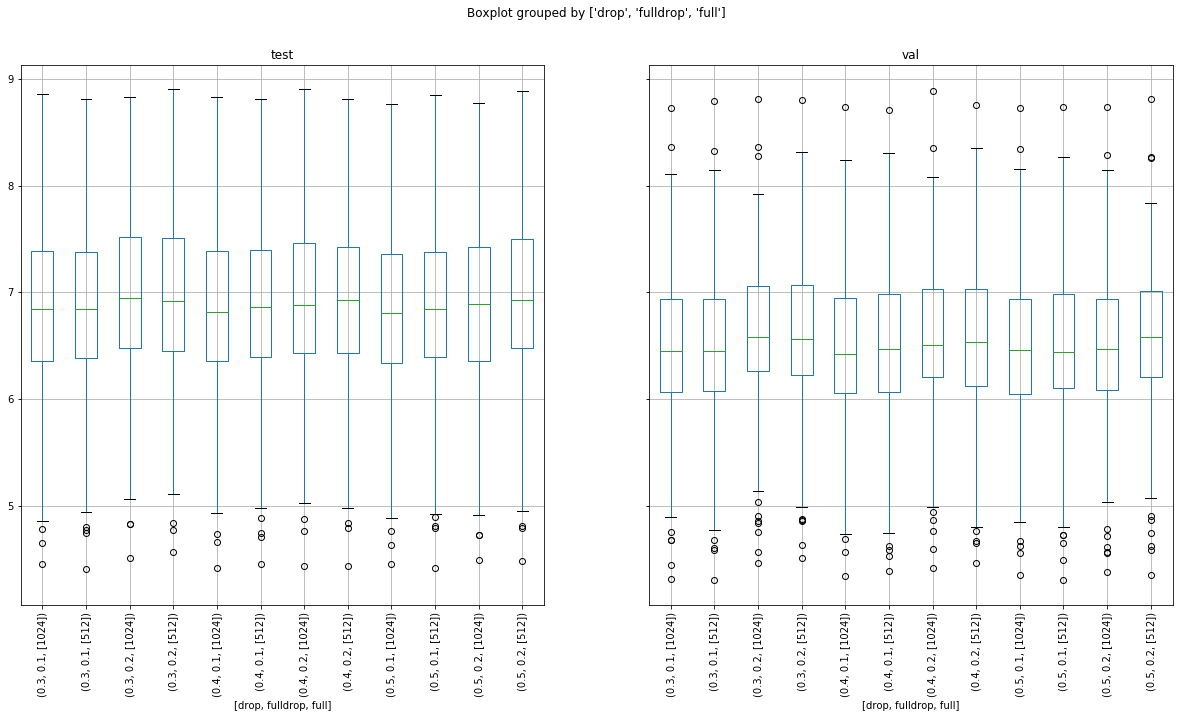

In [88]:
a[a['neurons']=='32'].boxplot(by=['drop', 'fulldrop','full'],figsize=(20,10), rot=90)

In [89]:
b =a.groupby(by=['neurons',  'full', 'drop', 'fulldrop' ],as_index=False).mean()
b.style.highlight_max()

,neurons,full,drop,fulldrop,test,val
0,16,[1024],0.3,0.1,6.79354,6.48243
1,16,[1024],0.3,0.2,6.87117,6.58234
2,16,[1024],0.4,0.1,6.78802,6.4769
3,16,[1024],0.4,0.2,6.85906,6.5566
4,16,[1024],0.5,0.1,6.79148,6.47827
5,16,[1024],0.5,0.2,6.852,6.55359
6,16,[512],0.3,0.1,6.80735,6.50339
7,16,[512],0.3,0.2,6.85788,6.56615
8,16,[512],0.4,0.1,6.79384,6.48541
9,16,[512],0.4,0.2,6.88307,6.59668


final best configuration GRU/64/0.4/512/0.2

## Fit 5

In [76]:
query={'experiment':'rnns2sfit5'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'fulldrop', 'nlayers'],data=['lag'])

In [77]:
#results.exp_df 

In [78]:
a=results.exp_df.groupby(['site', 'drop','fulldrop','full','lag','nlayers'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc94a7048>,
      dtype=object)

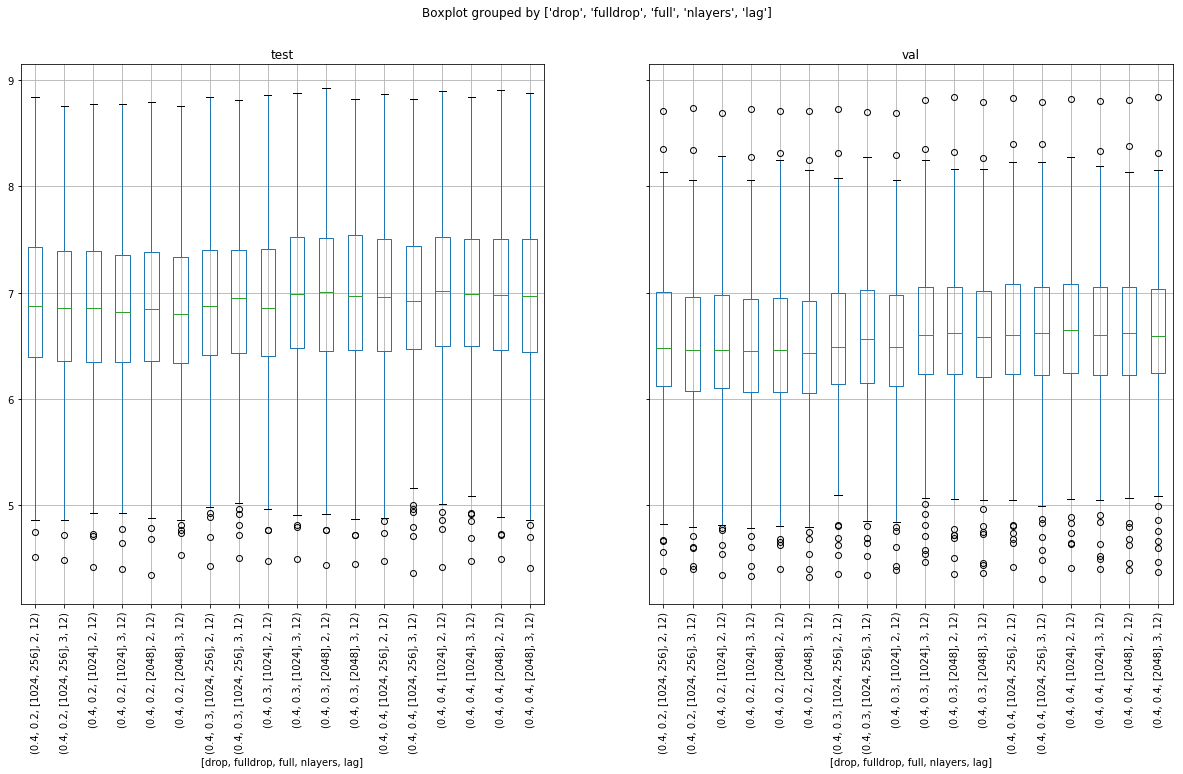

In [79]:
a[(a['lag']=='12') & (a['drop']=='0.4')].boxplot(by=['drop', 'fulldrop', 'full','nlayers', 'lag'],figsize=(20,10), rot=90)

In [80]:
b =a.groupby(by=['full', 'drop', 'fulldrop' ,'lag','nlayers'],as_index=False).mean()
b[b['drop']=='0.4'].style.highlight_max()

,full,drop,fulldrop,lag,nlayers,test,val
0,"[1024, 256]",0.4,0.2,12,2,6.82221,6.51397
1,"[1024, 256]",0.4,0.2,12,3,6.79072,6.48164
2,"[1024, 256]",0.4,0.2,18,2,6.80952,6.4965
3,"[1024, 256]",0.4,0.2,18,3,6.76534,6.4504
4,"[1024, 256]",0.4,0.3,12,2,6.81831,6.51999
5,"[1024, 256]",0.4,0.3,12,3,6.84839,6.54989
6,"[1024, 256]",0.4,0.3,18,2,6.7988,6.49339
7,"[1024, 256]",0.4,0.3,18,3,6.82009,6.52487
8,"[1024, 256]",0.4,0.4,12,2,6.89058,6.60534
9,"[1024, 256]",0.4,0.4,12,3,6.86343,6.57366


Best configuration 32/0.4/1024/0.4/L12

## Fit 6

In [81]:
query={'experiment':'rnns2sfit6'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'fulldrop', 'nlayers'])

In [82]:
a=results.exp_df.groupby(['site', 'drop','fulldrop','nlayers'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0091da0>,
      dtype=object)

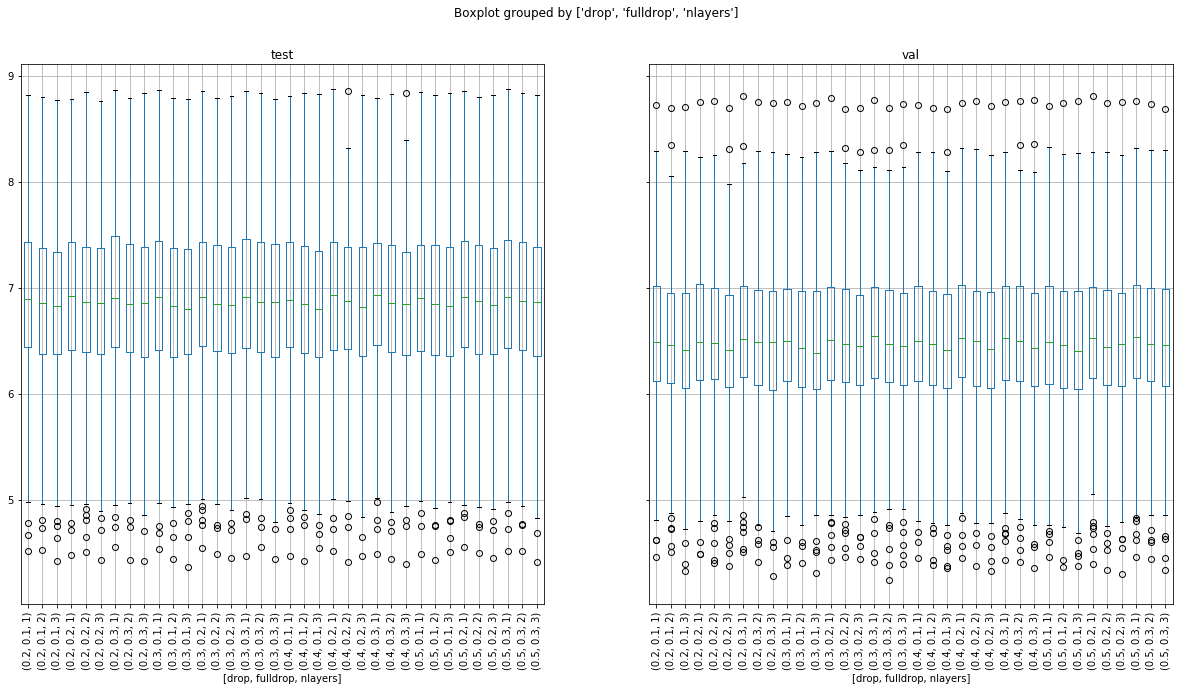

In [83]:
a.boxplot(by=['drop', 'fulldrop', 'nlayers'],figsize=(20,10), rot=90)

In [84]:
b =a.groupby(by=['nlayers','drop', 'fulldrop'],as_index=False).mean()
b.style.highlight_max()

,nlayers,drop,fulldrop,test,val
0,1,0.2,0.1,6.84327,6.52188
1,1,0.2,0.2,6.84119,6.53526
2,1,0.2,0.3,6.85037,6.54348
3,1,0.3,0.1,6.83863,6.5239
4,1,0.3,0.2,6.84485,6.53926
5,1,0.3,0.3,6.8539,6.5505
6,1,0.4,0.1,6.83319,6.52398
7,1,0.4,0.2,6.8485,6.54363
8,1,0.4,0.3,6.8539,6.54135
9,1,0.5,0.1,6.83777,6.52303
